<a href="https://colab.research.google.com/github/aioshi21chowdhury/baby_cry_lang/blob/main/baby_cry_audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##audio to spcetogram

In [1]:
pip install librosa matplotlib numpy torch torchvision torchaudio tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define paths
AUDIO_DIR = "/content/main"  # Change this to your dataset path
OUTPUT_DIR = "spectrograms"

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Loop through folders and convert audio to spectrograms
for category in os.listdir(AUDIO_DIR):
    category_path = os.path.join(AUDIO_DIR, category)
    output_category_path = os.path.join(OUTPUT_DIR, category)
    os.makedirs(output_category_path, exist_ok=True)

    for audio_file in os.listdir(category_path):
        if audio_file.endswith(".wav"):
            audio_path = os.path.join(category_path, audio_file)

            # Load audio file
            y, sr = librosa.load(audio_path, sr=22050)

            # Convert to Mel Spectrogram
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

            # Save as Image
            plt.figure(figsize=(5, 5))
            librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel")
            plt.axis("off")
            output_path = os.path.join(output_category_path, audio_file.replace(".wav", ".png"))
            plt.savefig(output_path, bbox_inches="tight", pad_inches=0)
            plt.close()


In [3]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.models import vit_b_16  # Pretrained ViT model

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize for ViT
])

# Path to the spectrograms folder
spectrograms_dir = "/content/spectrograms"

# Remove .ipynb_checkpoints directory if it exists
checkpoints_dir = os.path.join(spectrograms_dir, ".ipynb_checkpoints")
if os.path.exists(checkpoints_dir):
    print(f"Removing .ipynb_checkpoints directory: {checkpoints_dir}")
    os.rmdir(checkpoints_dir)  # Removes the empty directory

# Load dataset
dataset = ImageFolder(root=spectrograms_dir, transform=transform)

# Ensure only valid classes are loaded
valid_classes = [cls for cls in dataset.classes if cls != ".ipynb_checkpoints"]
print(f"Classes Found: {valid_classes}")

# DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Load pretrained ViT model
model = vit_b_16(pretrained=True)
num_classes = len(valid_classes)
model.heads.head = torch.nn.Linear(model.heads.head.in_features, num_classes)  # Adjust output layer

# Check dataset labels
print(f"Classes: {dataset.classes}")


Removing .ipynb_checkpoints directory: /content/spectrograms/.ipynb_checkpoints
Classes Found: ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 154MB/s]


Classes: ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalization for ViT
])

# Load dataset
SPECTROGRAM_FOLDER = "/content/spectrograms"  # Update this path
dataset = ImageFolder(root=SPECTROGRAM_FOLDER, transform=transform)

# Split dataset (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Load Pretrained ViT Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vit_b_16(pretrained=True)
num_classes = len(dataset.classes)
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)  # Adjust output layer
model = model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training Loop
num_epochs = 15  # Adjust based on performance
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")

print("Training Completed!")



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/15, Loss: 0.7471
Epoch 2/15, Loss: 0.6726
Epoch 3/15, Loss: 0.6658
Epoch 4/15, Loss: 0.6748
Epoch 5/15, Loss: 0.6470
Epoch 6/15, Loss: 0.6381
Epoch 7/15, Loss: 0.6351
Epoch 8/15, Loss: 0.5497
Epoch 9/15, Loss: 0.4914
Epoch 10/15, Loss: 0.3088
Epoch 11/15, Loss: 0.3042
Epoch 12/15, Loss: 0.2651
Epoch 13/15, Loss: 0.1683
Epoch 14/15, Loss: 0.1733
Epoch 15/15, Loss: 0.1014
Training Completed!


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

✅ Accuracy: 0.8152
✅ Precision: 0.6975
✅ Recall: 0.8152
✅ F1 Score: 0.7518

Classification Report:
               precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         3
     burping       0.00      0.00      0.00         3
  discomfort       0.00      0.00      0.00         6
      hungry       0.83      0.97      0.90        77
       tired       0.00      0.00      0.00         3

    accuracy                           0.82        92
   macro avg       0.17      0.19      0.18        92
weighted avg       0.70      0.82      0.75        92



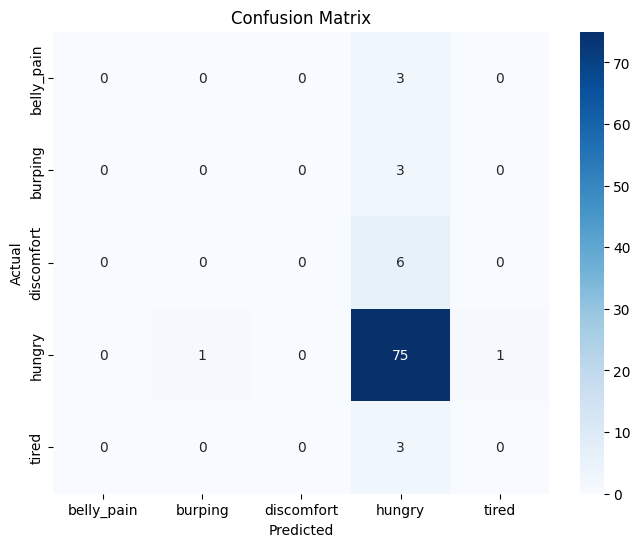

In [10]:
from sklearn.metrics import classification_report

# Evaluation
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)  # Get class with max probability

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=dataset.classes))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
import torch

# Define the file path where the model will be saved
model_save_path = "/content/saved_model(baby cry detection)"

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved successfully at {model_save_path}")


Model saved successfully at /content/saved_model(baby cry detection)
